This notebook is to use Calour to produce the two heatmap figures in Figure 5 (c,d)

In [1]:
import warnings   
warnings.simplefilter("ignore") 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab
%matplotlib notebook

import sys
sys.path.append('/Users/Serene/git/Amnon/calour')
import calour as cl
import numpy as np
import pandas as pd

from scipy.stats import sem
import pickle

cl.set_log_level(40) 

## CFS

In [15]:
cfs = cl.read_amplicon('../data/cfs.biom','../data/cfs.map.txt', sparse=False, filter_reads=1000, normalize=10000)
cfs_sub1 = cfs.filter_min_abundance(5)

In [16]:
ds1_cfs = cfs_sub1.diff_abundance('Subject','Control','Patient', fdr_method='dsfdr')
bh1_cfs = cfs_sub1.diff_abundance('Subject','Control','Patient', fdr_method='bhfdr')

In [17]:
print(ds1_cfs)
print(bh1_cfs)

AmpliconExperiment cfs.biom with 87 samples, 64 features
AmpliconExperiment cfs.biom with 87 samples, 0 features


In [18]:
ds2_cfs = ds1_cfs.filter_samples('Subject',['Control','Patient'])
bh2_cfs = bh1_cfs.filter_samples('Subject',['Control','Patient'])

<IPython.core.display.Javascript object>


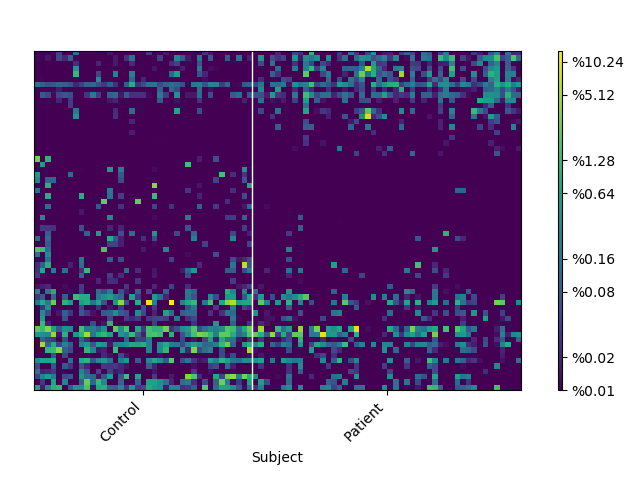

In [32]:
ds2_cfs.plot_sort('Subject', databases=[], feature_field=None, gui='jupyter', show_legend=True)
plt.savefig('../plots/cfs_heatmap.png', bbox_to_inches='tight')

<IPython.core.display.Javascript object>


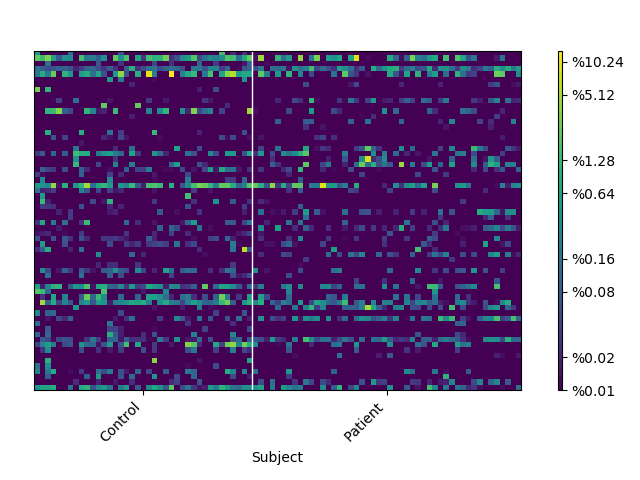

In [25]:
more = ds2_cfs.feature_metadata.index.difference(bh2_cfs.feature_metadata.index)
more = ds2_cfs.filter_ids(more.values)
more.plot_sort('Subject', databases=[], feature_field=None, gui='jupyter', show_legend=True)

## MLT

In [7]:
mlt = cl.read_amplicon('../data/mlt.biom','../data/mlt.map.txt', sparse=False, filter_reads=1000, normalize=10000)
mlt_sub1 = mlt.filter_min_abundance(5)

In [8]:
ds1_mlt = mlt_sub1.diff_abundance('Description','mouse cecum, TLR5 knockout','mouse cecum, wild type', fdr_method='dsfdr')
bh1_mlt = mlt_sub1.diff_abundance('Description','mouse cecum, TLR5 knockout','mouse cecum, wild type', fdr_method='bhfdr')

In [11]:
print(ds1_mlt)
print(bh1_mlt)

AmpliconExperiment mlt.biom with 8 samples, 41 features
AmpliconExperiment mlt.biom with 8 samples, 0 features


<IPython.core.display.Javascript object>


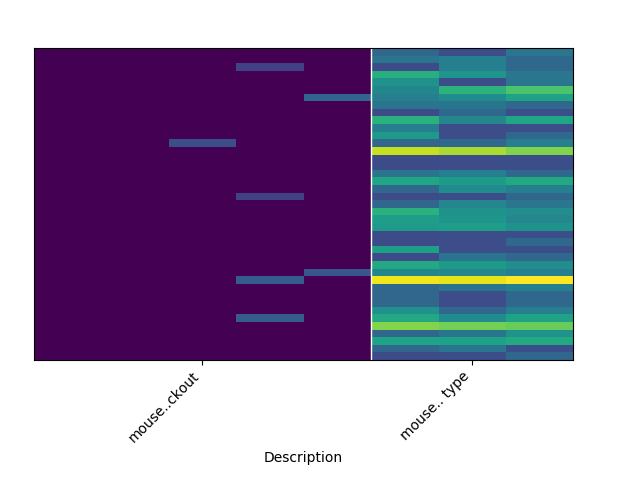

In [33]:
ds1_mlt.plot_sort('Description', databases=[], feature_field=None, gui='jupyter') 
plt.savefig('../plots/mlt_heatmap.png', bbox_to_inches='tight')